## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess, decode_predictions as vgg_decode
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions as resnet_decode
from tensorflow.keras.preprocessing import image

In [2]:
# Load pre-trained models
vgg_model = VGG16(weights='imagenet')
resnet_model = ResNet50(weights='imagenet')

In [3]:
# Function to load image from file or webcam
def get_image_from_webcam():
    cap = cv2.VideoCapture(0)
    print("Press 's' to take a snapshot.")
    while True:
        ret, frame = cap.read()
        cv2.imshow("Webcam - Press 's' to save", frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            img_path = "captured_image.jpg"
            cv2.imwrite(img_path, frame)
            break
    cap.release()
    cv2.destroyAllWindows()
    return img_path

# Function to preprocess and predict
def predict_with_models(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    # For VGG
    x_vgg = np.expand_dims(img_array.copy(), axis=0)
    x_vgg = vgg_preprocess(x_vgg)
    vgg_preds = vgg_model.predict(x_vgg)
    vgg_top = vgg_decode(vgg_preds, top=5)[0]


    return vgg_top, img

In [4]:
# Function to load image from file or webcam
def get_image_from_webcam():
    cap = cv2.VideoCapture(0)
    print("Press 's' to take a snapshot.")
    while True:
        ret, frame = cap.read()
        cv2.imshow("Webcam - Press 's' to save", frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            img_path = "captured_image.jpg"
            cv2.imwrite(img_path, frame)
            break
    cap.release()
    cv2.destroyAllWindows()
    return img_path

# Function to preprocess and predict
def predict_with_models(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    # For VGG
    x_vgg = np.expand_dims(img_array.copy(), axis=0)
    x_vgg = vgg_preprocess(x_vgg)
    vgg_preds = vgg_model.predict(x_vgg)
    vgg_top = vgg_decode(vgg_preds, top=5)[0]

    # For ResNet
    x_resnet = np.expand_dims(img_array.copy(), axis=0)
    x_resnet = resnet_preprocess(x_resnet)
    resnet_preds = resnet_model.predict(x_resnet)
    resnet_top = resnet_decode(resnet_preds, top=5)[0]

    return vgg_top, resnet_top, img

In [9]:
# Main: Choose source (webcam or manual)
use_webcam = False # Set to False to use a saved image
if use_webcam:
    img_path = get_image_from_webcam()
else:
    img_path = 'rose.jpg'  # Replace with your file path

vgg_preds, resnet_preds, img_display = predict_with_models(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


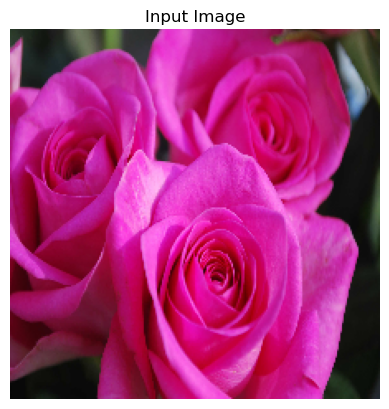

In [10]:
# Show image and predictions
plt.imshow(img_display)
plt.axis('off')
plt.title("Input Image")
plt.show()

In [11]:
print("\n VGG16 Top Predictions:")
for i, (name, desc, score) in enumerate(vgg_preds):
    print(f"{i+1}. {desc} ({score:.4f})")


 VGG16 Top Predictions:
1. daisy (0.1840)
2. coil (0.1118)
3. bee (0.0845)
4. velvet (0.0586)
5. ant (0.0466)


In [12]:
print("\n ResNet50 Top Predictions:")
for i, (name, desc, score) in enumerate(resnet_preds):
    print(f"{i+1}. {desc} ({score:.4f})")


 ResNet50 Top Predictions:
1. bee (0.2418)
2. artichoke (0.1400)
3. picket_fence (0.0698)
4. velvet (0.0466)
5. ant (0.0417)
